In [1]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

<h2>Declaración de funciones generales</h2>

In [2]:
def transformar_datos(dataset):
    
    # Utilizamos el diccionario para adaptar los datos
    for i in range(dataset.datos.shape[0]):
        for j in range(dataset.datos.shape[1]):
            if dataset.nominalAtributos[j]:
                dataset.datos[i, j] = dataset.diccionario[j][dataset.datos[i, j]]
    

def get_train_test(dataset, seed=None, p=0.2):
    vs = ValidacionSimple(p, 1)
    particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

    datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
    datostest = dataset.extraeDatos(particiones[0].indicesTest)
    
    return datostrain, datostest


Por simplicidad, durante estas pruebas se va a utilizar validación simple.

<h2>Prueba de VecinosProximos<h2>

Vamos a probar para distintos valores de k y para los dos datasets dados la precisión de nuestro algoritmo k-NN. Para cada valor de k ejecutaremos el algoritmo con cada una de las 3 distancias. Después, para el que se haya obtenido mejor rendimiento (tanto k como distancia) probaremos a ejecutar sin la normalización de los datos. Siempre escogeremos que el 80% de los datos sean de train y el 20% de test. Haremos que k vaya desde 1 hasta 50 para observar como evoluciona la precisión según el valor de k.

In [3]:
k_values = np.arange(1, 50)

<h3>wdbc.data</h3>

<h4>Distancia euclídea</h4>

In [4]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)

seed=0
p=0.2
datostrain, datostest = get_train_test(dataset,seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

k_precision_wdbc_euclidean = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_wdbc_euclidean[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

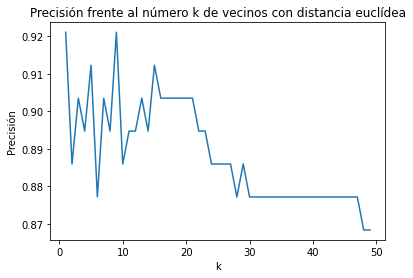

In [5]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos con distancia euclídea")
plt.show()

<h4>Distancia Manhattan</h4>

In [6]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)

seed = 0
p = 0.2
datostrain, datostest = get_train_test(dataset, seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

k_precision_wdbc_manhattan = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_wdbc_manhattan[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

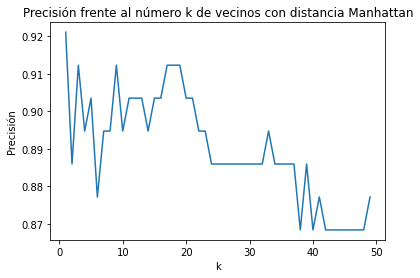

In [7]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_manhattan)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos con distancia Manhattan")
plt.show()

<h4>Distancia Mahalanobis</h4>

In [8]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)

seed = 0
p = 0.2
datostrain, datostest = get_train_test(dataset, seed=seed, p=0.2)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, norm)

k_precision_wdbc_mahalanobis = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_wdbc_mahalanobis[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

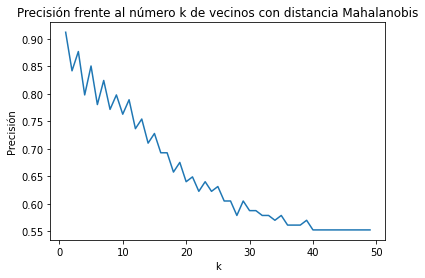

In [9]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_mahalanobis)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos con distancia Mahalanobis")
plt.show()

<h3>pima-indians-diabetes.data</h3>

<h4>Distancia euclídea</h4>

In [8]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)

seed = 0
p = 0.2
datostrain, datostest = get_train_test(dataset, seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, norm=False)

k_precision_pima_euclidean = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_pima_euclidean[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

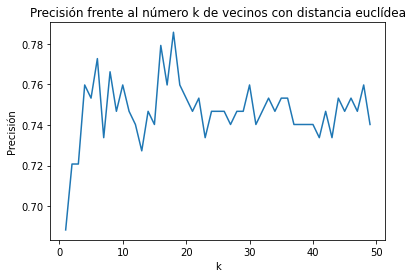

In [9]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos con distancia euclídea")
plt.show()

<h4>Distancia Manhattan</h4>

In [12]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

k_precision_pima_manhattan = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_pima_manhattan[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

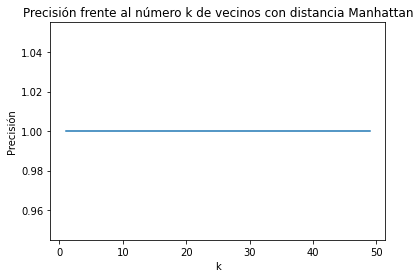

In [13]:
plt.figure()
plt.plot(k_values, k_precision_pima_manhattan)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos con distancia Manhattan")
plt.show()

<h4>Distancia Mahalanobis</h4>

In [26]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

k_precision_pima_mahalanobis = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_pima_mahalanobis[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

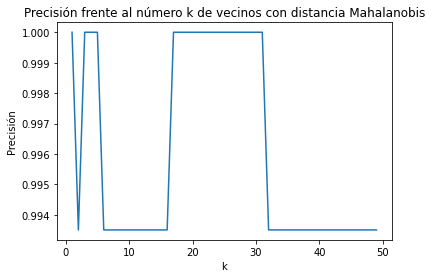

In [27]:
plt.figure()
plt.plot(k_values, k_precision_pima_mahalanobis)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos con distancia Mahalanobis")
plt.show()

<h2>Prueba de RegresionLogistica</h2>

In [24]:
n_epocas_values=np.arange(1000, 10000, 2000)
alpha_values = np.arange(0.001, 0.011, 0.001)

<h3>wdbc.data</h3>

In [25]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

epocas_precision_wdbc = np.empty((n_epocas_values.shape[0], alpha_values.shape[0]) )

i = 0

for n_epocas in n_epocas_values:
    j = 0
    for alpha in alpha_values:
        cl = ClasificadorRegresionLogistica(alpha=alpha, n_epocas=n_epocas)
        cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
        prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

        epocas_precision_wdbc[i][j] = 1-cl.error(datostest, prediccion)
        j += 1
        
    i += 1

C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:308: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


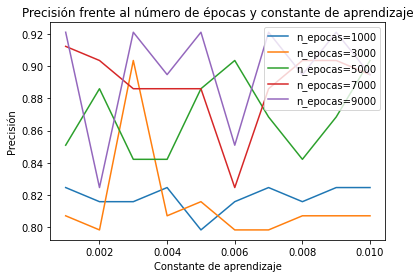

In [28]:
plt.figure()
for i in range(epocas_precision_wdbc.shape[0]):
    plt.plot(alpha_values, epocas_precision_wdbc[i], label="n_epocas="+str(n_epocas_values[i]))
plt.xlabel("Constante de aprendizaje")
plt.ylabel("Precisión")
plt.title("Precisión frente al número de épocas y constante de aprendizaje")
plt.legend(loc = "upper right")
plt.show()

<h3>pima-indians-diabetes.data</h3>

In [58]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

epocas_precision_pima = np.empty(len(n_epocas_values))

cnt = 0

for n_epocas in n_epocas_values:
    cl = ClasificadorRegresionLogistica(alpha=0.01, n_epocas=n_epocas)
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    epocas_precision_pima[cnt] = 1-cl.error(datostest, prediccion)
    cnt += 1

C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:297: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [59]:
print(epocas_precision_pima)

[0.72727273 0.75324675 0.72727273 0.74025974 0.72727273 0.7012987
 0.67532468 0.72727273 0.68831169 0.75974026]


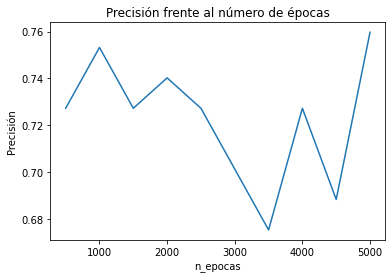

In [60]:
plt.figure()
plt.plot(n_epocas_values, epocas_precision_pima)
plt.xlabel("n_epocas")
plt.ylabel("Precisión")
plt.title("Precisión frente al número de épocas")
plt.show()

<h2>Comparación con Scikit-Learn</h2>

<h3>VecinosProximos<h3>

Igual que en el apartado anterior, por simplicidad utilizaremos siempre validación simple  con una iteración. Primero transformamos los datos al formato adecuado y realizamos la partición:

In [16]:
archivo = 'pima-indians-diabetes.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

Ejecutamos el algoritmo de clasificación de vecinos próximos primero con n_vecinos = 5 y distancia euclidea:

In [20]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', p=2, metric='minkowski', metric_params=None, n_jobs=None).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.7597402597402597


Ahora hacemos el mismo experimento que en el apartado anteriorn para n_vecinos de 1 a 50. 

In [56]:
archivo = 'wdbc.data'
p = 0.3
seed = 0

dataset = Datos(archivo)

datos = dataset.datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j == datos.shape[1] - 1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]  
            
X = datos[:, :-1]
y = datos[:, -1]

X = X.astype('int32')
y = y.astype('int32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

Observamos que no hay diferencia entre haber utilizado Laplace y no haberlo utilizado. Puede que en este caso haya sido así, pero en general es buena idea utilizar Laplace, porque no se sabe como es el dataset, y podría ocurrir que alguna de las probabilidades condicionadas fuesen 0.

In [57]:
clf = LogisticRegression(random_state=seed, max_iter=5000).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.9590643274853801


In [ ]:
print('\ttic-tac-toe scikit\ttic-tac-toe propio\tgerman scikit\t\tgerman propio')
print('VS\t(', round(1-ac_tic_simple_0, 3), ')\t\t(', round(media_vs_a1, 3), round(desv_vs_a1,3), ')\t\t(', round(1-ac_german_simple, 3), ')\t\t(', round(media_vs_a2, 3), round(desv_vs_a2,3), ')')
print('VC\t(', round(np.mean(1-ac_tic_cruzada_0), 3), round(np.std(1-ac_tic_cruzada_0),3), ')\t\t(', round(media_vc_a1, 3), round(desv_vc_a1,3), ')\t\t(', round(np.mean(1-ac_german_cruzada), 3), round(np.std(1-ac_german_cruzada),3), ')\t\t(', round(media_vc_a2, 3), round(desv_vc_a2,3), ')')


En general, parece que nuestro estimador comete menos errores que el de Scikit para estos datos y esta semilla. Habría que realizar pruebas mas extensas para medir las calidades y comparar ambos esitimadores adecuadamente.

<h3>Evaluación de hipótesis mediante Análisis ROC</h3>

Vamos a realizar este análisis para cada tipo de validación y para cada dataset.

In [ ]:
p = 0.2
seed = 0
k = 10

def get_ROC_data(conf_data, clases, ocurrencias_clases):
    
    matriz_conf = np.zeros((2, 2))
    matriz_conf[0][0] = ocurrencias_clases[clases[1]]
    matriz_conf[0][1] = ocurrencias_clases[clases[0]]
    tpr = np.empty(len(datostest))
    fpr = np.empty(len(datostest))

    for i in range(len(conf_data)):
        if conf_data[i][1] == clases[0]: # Dato negativo
            matriz_conf[1][1] += 1 #TN
            matriz_conf[0][1] -= 1 #FP

        else: # Dato positivo
            matriz_conf[1][0] += 1 #FN
            matriz_conf[0][0] -= 1 #TP


        tpr[i] = matriz_conf[0][0]/(matriz_conf[0][0]+matriz_conf[1][0])

        fpr[i] = matriz_conf[0][1]/(matriz_conf[0][1]+matriz_conf[1][1])
    
    return tpr, fpr

def get_matriz_conf(datostest, prediccion, clases):
    matriz_conf = np.zeros((2, 2))
    
    for i in range(len(datostest)):
        if prediccion[i] == clases[0]:
            if datostest[i][-1] == clases[0]: # TN
                matriz_conf[1][1] += 1
            else: # FN 
                matriz_conf[1][0] += 1
        else:
            if datostest[i][-1] == clases[0]: # FP
                matriz_conf[0][1] += 1
            else: # TP
                matriz_conf[0][0] += 1
    
    return matriz_conf

<h5>tic-tac-toe.data y validación simple</h5>

In [ ]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)
datostest = np.array(datostest)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = sorted(clases)

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


Pasamos a construir los datos necesarios para la curva ROC y a obtener la matriz de confusión. Como anotación, se asume que la clase negativa es la de menor valor y la positiva la de mayor valor.

In [ ]:
tpr_tic_simple, fpr_tic_simple = get_ROC_data(conf_data, clases, counts)
matriz_conf_tic_simple = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [ ]:
print("Matriz de confusión tic-tac-toe.data validación simple")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_tic_simple[0][0], " \t\t ", matriz_conf_tic_simple[0][1])
print("\t Negativo ", matriz_conf_tic_simple[1][0], " \t\t ", matriz_conf_tic_simple[1][1])

In [ ]:
plt.figure()
plt.plot(fpr_tic_simple, tpr_tic_simple)
plt.title("Curva ROC tic-tac-toe.data validación simple")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h5>tic-tac-toe.data y validación cruzada con k=10</h5>

In [ ]:
archivo = 'tic-tac-toe.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vc = ValidacionCruzada(k)

particiones = vc.creaParticiones(len(dataset.datos), seed=seed)
matrices_conf_tic_cruzada = []
tpr_tic_cruzada_lista = []
fpr_tic_cruzada_lista = []

for particion in particiones:
    datostrain = dataset.extraeDatos(particion.indicesTrain)
    datostest = dataset.extraeDatos(particion.indicesTest)
    datostest = np.array(datostest)

    clases, counts = np.unique(datostest[:, -1], return_counts=True)
    clases = sorted(clases)


    cl = ClasificadorNaiveBayes()
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    conf_data = np.empty((len(prediccion), 2))
    for i in range(conf_data.shape[0]):
        conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

    conf_data = sorted(conf_data, key=lambda x: x[0])
    
    tpr_tic_cruzada, fpr_tic_cruzada = get_ROC_data(conf_data, clases, counts)
    matriz_conf_tic_cruzada = get_matriz_conf(datostest, prediccion, clases)
    matrices_conf_tic_cruzada.append(matriz_conf_tic_cruzada)
    tpr_tic_cruzada_lista.append(tpr_tic_cruzada)
    fpr_tic_cruzada_lista.append(fpr_tic_cruzada)

In [ ]:
for i in range(k):
    print("Matriz de confusión tic-tac-toe.data validación cruzada fold", i+1)
    print()
    print("\t\t\t\tReal")
    print("\t\t  Positivo\t\tNegativo")
    print("Estimado Positivo ", matrices_conf_tic_cruzada[i][0][0], " \t\t ", matrices_conf_tic_cruzada[i][0][1])
    print("\t Negativo ", matrices_conf_tic_cruzada[i][1][0], " \t\t ", matrices_conf_tic_cruzada[i][1][1])
    print()

In [ ]:
plt.figure()

for i in range(k):
    plt.plot(fpr_tic_cruzada_lista[i], tpr_tic_cruzada_lista[i], label="Fold " + str(i))
    
plt.title("Curva ROC tic-tac-toe.data validación cruzada")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

<h5>german.data y validación simple</h5>

In [ ]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]

vs = ValidacionSimple(p, 1)
particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
datostest = dataset.extraeDatos(particiones[0].indicesTest)
datostest = np.array(datostest)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = sorted(clases)

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


In [ ]:
tpr_german_simple, fpr_german_simple = get_ROC_data(conf_data, clases, counts)
matriz_conf_german_simple = get_matriz_conf(datostest, prediccion, clases)

In [ ]:
print("Matriz de confusión german.data validación simple")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_german_simple[0][0], " \t\t ", matriz_conf_german_simple[0][1])
print("\t Negativo ", matriz_conf_german_simple[1][0], " \t\t ", matriz_conf_german_simple[1][1])

In [ ]:
plt.figure()
plt.plot(fpr_german_simple, tpr_german_simple)
plt.title("Curva ROC german.data validación simple")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h5>german.data y validación cruzada con k=10</h5>

In [ ]:
archivo = 'german.data'

dataset = Datos(archivo)

datos = dataset.datos
# Utilizamos el diccionario para adaptar los datos
for i in range(datos.shape[0]):
    for j in range(datos.shape[1]):
        if dataset.nominalAtributos[j] or j==datos.shape[1]-1:
            datos[i, j] = dataset.diccionario[j][datos[i, j]]


vc = ValidacionCruzada(k)

particiones = vc.creaParticiones(len(dataset.datos), seed=seed)
matrices_conf_german_cruzada = []
tpr_german_cruzada_lista = []
fpr_german_cruzada_lista = []

for particion in particiones:
    datostrain = dataset.extraeDatos(particion.indicesTrain)
    datostest = dataset.extraeDatos(particion.indicesTest)
    datostest = np.array(datostest)

    clases, counts = np.unique(datostest[:, -1], return_counts=True)
    clases = sorted(clases)

    cl = ClasificadorNaiveBayes()
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    conf_data = np.empty((len(prediccion), 2))
    for i in range(conf_data.shape[0]):
        conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

    conf_data = sorted(conf_data, key=lambda x: x[0])
    
    tpr_german_cruzada, fpr_german_cruzada = get_ROC_data(conf_data, clases, counts)
    matriz_conf_german_cruzada = get_matriz_conf(datostest, prediccion, clases)
    matrices_conf_german_cruzada.append(matriz_conf_german_cruzada)
    tpr_german_cruzada_lista.append(tpr_german_cruzada)
    fpr_german_cruzada_lista.append(fpr_german_cruzada)

In [ ]:
for i in range(k):
    print("Matriz de confusión german.data validación cruzada fold", i+1)
    print()
    print("\t\t\t\tReal")
    print("\t\t  Positivo\t\tNegativo")
    print("Estimado Positivo ", matrices_conf_german_cruzada[i][0][0], " \t\t ", matrices_conf_german_cruzada[i][0][1])
    print("\t Negativo ", matrices_conf_german_cruzada[i][1][0], " \t\t ", matrices_conf_german_cruzada[i][1][1])
    print()

In [ ]:
plt.figure()

for i in range(k):
    plt.plot(fpr_german_cruzada_lista[i], tpr_german_cruzada_lista[i], label="Fold " + str(i))
    
plt.title("Curva ROC german.data validación cruzada")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc='lower right')
plt.show()

A continuación, vamos a calcular las áreas bajo las curvas ROC (AUC) para determinar la calidad de cada método:

In [ ]:
def AUC(fpr, tpr):

    auc = 0
    for i in range(len(tpr)-1):
        auc += (fpr[i]-fpr[i+1])*tpr[i]
    
    auc += fpr[-1]*tpr[-1]
        
    return auc

In [ ]:
auc_tic_simple = AUC(fpr_tic_simple, tpr_tic_simple)
auc_german_simple = AUC(fpr_german_simple, tpr_german_simple)

auc_tic_cruzada_lista = []
auc_german_cruzada_lista = []

for i in range(len(fpr_tic_cruzada_lista)):
    auc_tic_cruzada_lista.append(AUC(fpr_tic_cruzada_lista[i], tpr_tic_cruzada_lista[i]))
    auc_german_cruzada_lista.append(AUC(fpr_german_cruzada_lista[i], tpr_german_cruzada_lista[i]))

In [ ]:
print("AUC tic-tac-toe.data VS:", auc_tic_simple)

print()
for i in range(len(auc_tic_cruzada_lista)):
    print("AUC tic-tac-toe.data VC Fold " + str(i+1) + ":" , auc_tic_cruzada_lista[i])

print()
print("AUC tic-tac-toe.data VC media: ", np.mean(auc_tic_cruzada_lista))
print()
print("AUC german.data VS:", auc_german_simple)

print()
for i in range(len(auc_german_cruzada_lista)):
    print("AUC german.data VC Fold " + str(i+1) + ":" , auc_german_cruzada_lista[i])
    
print()
print("AUC german.data VC media: ", np.mean(auc_german_cruzada_lista))

En cuanto al dataset tic-tac-toe.data, observamos unos mejores resultados en el caso de la validación cruzada. Sin embargo, en el caso de german.data hay mejores resultados con la validación simple.

<h4> Comentarios respecto a modificaciones en el diseño de clases <h4>

En la clase EstrategiaParticionado, en la función creaParticiones cambiamos los parametros recomendados por un parametro n_datos, ya que en nuestra opinión es el único parámetro necesario para crear los conjuntos de indices. Con esto, deja de ser necesario pasar a la función una instancia de la clase Datos.

A la hora de entrenamiento y clasificación, modificamos el conjunto de datos a un formado adecuado (cambiar los atributos nominales a un entero siguiendo el orden alfabético) utilizando el diccionario fuera de las funciones de la clase Clasificador. Esto nos parece más adecuado en cuanto a la separación las funcionalidades. 

También, tenemos el criterio de transformar la clase a su valor en el diccionario, sea el atributo nominal o numérico ya que la clase siempre es discreta. 
Esto permite simplificar el codigo gracias a la posible indexación array[valor1_clase].

Asumimos la equivalencia entre nominalAtributos de la clase Datos y el parámetro atributosDiscretos que se pasa a las funciones de la clase Clasificador (con esta suposición resulta coherente transformar los valores de clase, atributo discreto, siempre a un entero entre 0 y n_valores). 

En la función clasifica añadimos el atributo alpha, el parámetro de la corrección de Laplace. 

Por último, cambiamos los atributos que se pasan a la función validacion de la clase Clasificador añadiendo todos aquellos atributos necesarios para llamar a las funciones entrenamiento y clasifica. También, eliminamos el parametro clasificador llamando a la función validación como instancia_clasificador.validacion(...).